In [55]:
## Packages to include
import matplotlib.pyplot as plt
import numpy as np
import math

In [49]:
## BLS12_381 data
logq = 381 ## bit size of the base field order
logp = 255 ## bit size of the elliptic curve group order
k = 8 ## number of chunks in the Exponential ElGamal construction
n = 4096 ## max degree of the polynomial in Danksharding
s = [i for i in range(1,n)] ## number of opened points during the protocol
logN = 3072 ## This provides 128-bit security
paillierPackingParam = math.floor(logN/logp)
expElgamalBandwidth = (logq*k)*np.array(s)+7*logq ## first term is the ciphertexts and the second term is the proofs
paillierBandwidth = (2*logN+512+2*logN)*np.array(s)+(381+256) ##The terms in order: ciphertexts, z_i, W_i, Cq, c
paillierCiphertexts = [math.floor(i) for i in np.array(s)/12]
packedPaillierBandwidth = np.array(paillierCiphertexts)*(381+4*logN)+np.array(s)*(3*logq+logq)

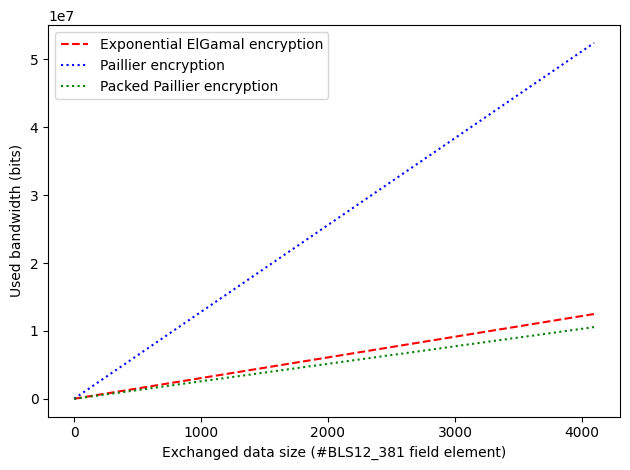

In [54]:
plt.plot(s,expElgamalBandwidth,linestyle = 'dashed',color='red', label="Exponential ElGamal encryption")
plt.plot(s,paillierBandwidth, linestyle = 'dotted', color='blue',label="Paillier encryption")
plt.plot(s,packedPaillierBandwidth, linestyle = 'dotted', color='green',label="Packed Paillier encryption")
plt.legend()
plt.xlabel("Exchanged data size (#BLS12_381 field element)")
plt.ylabel("Used bandwidth (bits)")
plt.tight_layout()
plt.savefig("./Figures/proofSizes.pdf")
plt.show()

In [ ]:
## Should we also put here the proof sizes of the multi-client model?

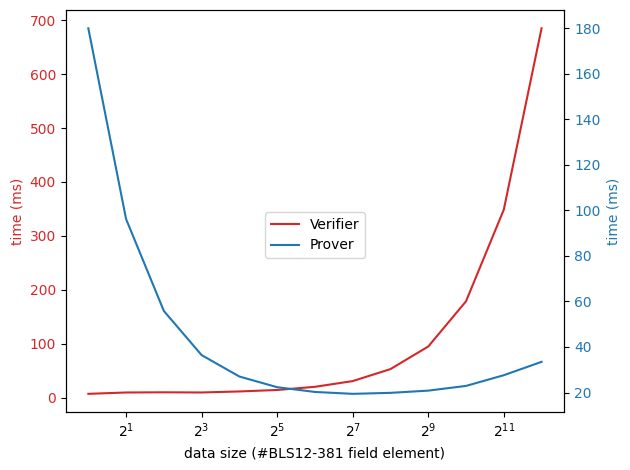

In [81]:
## Prover and verifier times
x_axis = [1<<exponent for exponent in range(13)]

proof_gen = [179.88, 96.14, 55.80, 36.42, 27.02, 22.34, 20.25, 19.42, 19.86, 20.83, 22.90, 27.60, 33.47]
proof_vfy = [6.01, 7.54, 7.63, 7.78, 8.03, 8.54, 9.16, 10.20, 11.83, 14.12, 17.68, 27.90, 41.65]
enc_check = [1.13, 2.11, 2.37, 1.9, 3.54, 5.78, 11.01, 20.6, 41.22, 80.78, 161.07, 320.77, 643.33]

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('data size (#BLS12-381 field element)')
ax1.set_ylabel('time (ms)', color=color)
ax1.plot(x_axis, np.array(proof_vfy) + np.array(enc_check), color=color, label="Verifier")
ax1.set_xscale('log', base=2)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('time (ms)', color=color)  # we already handled the x-label with ax1
ax2.plot(x_axis, proof_gen, color=color, label="Prover")
ax2.tick_params(axis='y', labelcolor=color)

fig.legend(loc='center')
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig("./Figures/proverVerifierTimes.pdf")
plt.show()